In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-hi")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-hi")

def translator(text):
  input_ids = tokenizer.encode(text, return_tensors="pt", padding=True)
  outputs = model.generate(input_ids)
  decoded_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
  return decoded_text

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/Hindi_English_Truncated_Corpus.csv")

In [9]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return 0
df['Word_Count'] = df['english_sentence'].apply(count_words)
df = df[(df['Word_Count'] >= 10) & (df['Word_Count'] <= 20)].sample(100)

In [31]:
import rouge
from collections import Counter
from nltk.translate.bleu_score import sentence_bleu

def wer(true_sentence, predicted_sentence):
    true_words = true_sentence.split()
    predicted_words = predicted_sentence.split()
    edit_distance = sum(1 for t, p in zip(true_words, predicted_words) if t != p)
    return edit_distance / len(true_words)

results = []

for index, row in df.iterrows():
  try:
    print("Index:", index)
    true_sentence = row['hindi_sentence']
    predicted_sentence = translator(row['english_sentence'])
    reference_translations = [true_sentence]
    bleu_score = sentence_bleu(reference_translations, predicted_sentence.split())
    evaluator = rouge.Rouge(metrics=['rouge-l'])
    scores = evaluator.get_scores(predicted_sentence, true_sentence)
    rouge_score_f = scores[0]['rouge-l']['f']
    rouge_score_r = scores[0]['rouge-l']['r']
    wer_score = wer(true_sentence, predicted_sentence)
    data = {"bleu_score": bleu_score, "rouge_score_f": rouge_score_f, "rouge_score_r": rouge_score_r, "wer_score": wer_score}
    results.append(data)
  except Exception as e:
    print("index:", index)
    print(row)

Index: 43800
Index: 91594
Index: 33998
Index: 346
Index: 124620
Index: 103325
Index: 96029
Index: 74393


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Index: 4336
Index: 11026
Index: 48820
Index: 24792
Index: 81917
Index: 33886
Index: 118696
Index: 103849
Index: 114170
Index: 57867
Index: 21831
Index: 9919
Index: 8849
Index: 28720
Index: 90159
Index: 64148
Index: 107815
Index: 111790
Index: 97976
Index: 105838
Index: 60652
Index: 116209
Index: 27490
Index: 117276
Index: 105053
Index: 117052
Index: 98063
Index: 35921
Index: 28482
Index: 67191
Index: 29841
Index: 69753
Index: 23768
index: 23768
source                                                          tides
english_sentence    Without exaggeration , Thackeray is Mumbai 's ...
hindi_sentence      अतिशयोइक्त में कहें तो वे मुंबई के प्रथम नागरि...
Word_Count                                                         10
Name: 23768, dtype: object
Index: 108759
Index: 57319
Index: 110782
Index: 66960
Index: 124739
Index: 88887
Index: 101358
Index: 112374
Index: 12372
Index: 123401
Index: 42454
Index: 88059
Index: 60325
Index: 125052
Index: 81230
Index: 5455
Index: 47901
Index: 97435
Inde

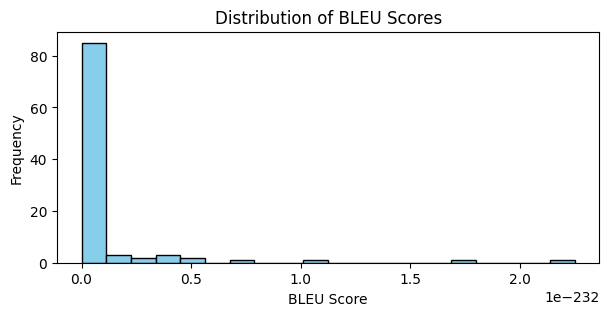

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
bleu_scores = [result['bleu_score'] for result in results]
plt.hist(bleu_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.title('Distribution of BLEU Scores')
plt.show()

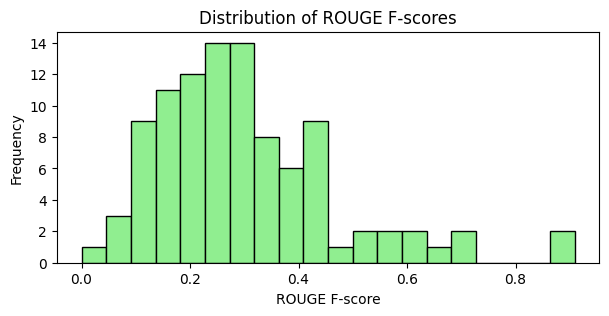

In [34]:
plt.figure(figsize=(7, 3))
rouge_f_scores = [result['rouge_score_f'] for result in results]
plt.hist(rouge_f_scores, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('ROUGE F-score')
plt.ylabel('Frequency')
plt.title('Distribution of ROUGE F-scores')
plt.show()

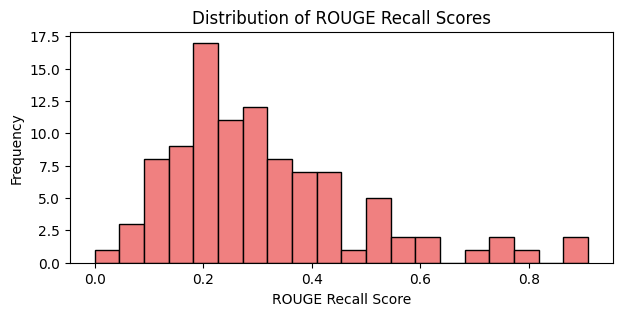

In [35]:
plt.figure(figsize=(7, 3))
rouge_r_scores = [result['rouge_score_r'] for result in results]
plt.hist(rouge_r_scores, bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('ROUGE Recall Score')
plt.ylabel('Frequency')
plt.title('Distribution of ROUGE Recall Scores')
plt.show()

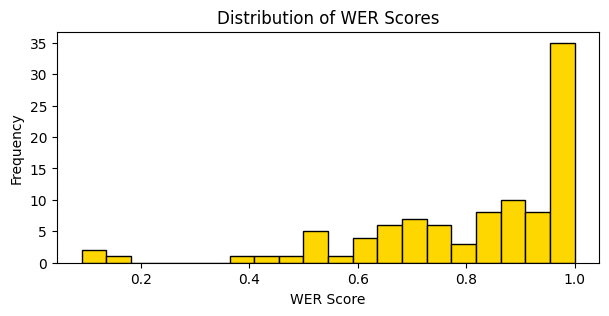

In [36]:
plt.figure(figsize=(7, 3))
wer_scores = [result['wer_score'] for result in results]
plt.hist(wer_scores, bins=20, color='gold', edgecolor='black')
plt.xlabel('WER Score')
plt.ylabel('Frequency')
plt.title('Distribution of WER Scores')
plt.show()

In [37]:
scores = pd.DataFrame(results)

In [39]:
scores.describe()

,bleu_score,rouge_score_f,rouge_score_r,wer_score
count,9.900000e+01,99.000000,99.000000,99.000000
mean,9.443837e-234,0.303145,0.311988,0.819232
std,0.000000e+00,0.170352,0.179543,0.206562
min,0.000000e+00,0.000000,0.000000,0.090909
25%,0.000000e+00,0.192012,0.195238,0.711310
50%,0.000000e+00,0.272727,0.272727,0.894737
75%,0.000000e+00,0.382784,0.384615,1.000000
max,2.251249e-232,0.909091,0.909091,1.000000


In [40]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-mr")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-mr")

def translator(text):
  input_ids = tokenizer.encode(text, return_tensors="pt", padding=True)
  outputs = model.generate(input_ids)
  decoded_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
  return decoded_text

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.17M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [45]:
df = pd.read_csv("/content/eng_mar_new_27_may_edit_1.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  3922 non-null   object
 1   Marathi  3922 non-null   object
dtypes: object(2)
memory usage: 61.4+ KB


In [47]:
df

,English,Marathi
0,Always try to be happy.,नेहमी आनंदी राहण्याचा प्रयत्न करा
1,Anything else,अजुन काही
2,Are you feeling awkward with us.,तुम्हाला आमच्यासोबत विचित्र जाणवते आहे का?
3,Are you feeling comfortable in this chair.,तुम्हाला ह्या खुर्चीवर आरामदायक जाणवते आहे का?
4,Are you in your senses,तु शुद्धीत आहे का?a
...,...,...
3917,zombie,झोम्बी
3918,zone,झोन
3919,zoo,प्राणीसंग्रहालय
3920,zoology,प्राणीशास्त्र


In [48]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return 0
df['Word_Count'] = df['English'].apply(count_words)

In [51]:
df = df[(df['Word_Count'] >= 10) & (df['Word_Count'] <= 20)]

In [53]:
import rouge
from collections import Counter
from nltk.translate.bleu_score import sentence_bleu

def wer(true_sentence, predicted_sentence):
    true_words = true_sentence.split()
    predicted_words = predicted_sentence.split()
    edit_distance = sum(1 for t, p in zip(true_words, predicted_words) if t != p)
    return edit_distance / len(true_words)

results = []

for index, row in df.iterrows():
  try:
    print("Index:", index)
    true_sentence = row['Marathi']
    predicted_sentence = translator(row['English'])
    reference_translations = [true_sentence]
    bleu_score = sentence_bleu(reference_translations, predicted_sentence.split())
    evaluator = rouge.Rouge(metrics=['rouge-l'])
    scores = evaluator.get_scores(predicted_sentence, true_sentence)
    rouge_score_f = scores[0]['rouge-l']['f']
    rouge_score_r = scores[0]['rouge-l']['r']
    wer_score = wer(true_sentence, predicted_sentence)
    data = {"bleu_score": bleu_score, "rouge_score_f": rouge_score_f, "rouge_score_r": rouge_score_r, "wer_score": wer_score}
    results.append(data)
  except Exception as e:
    print("index:", index)
    print(row)

Index: 62
Index: 106
Index: 332
Index: 344
Index: 368
Index: 369
Index: 464
Index: 653
Index: 659
Index: 664
Index: 665
Index: 673
Index: 678
Index: 679
Index: 684
Index: 685
Index: 693
Index: 698
Index: 699
Index: 703
Index: 711
Index: 723
Index: 726
Index: 732
Index: 733
Index: 737
Index: 740
Index: 741
Index: 746
Index: 747
Index: 756
Index: 757
Index: 758
Index: 763
Index: 766


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Index: 771
Index: 775
Index: 781
Index: 782
Index: 785
Index: 790
Index: 791
Index: 794
Index: 799
Index: 800
Index: 807
Index: 808
Index: 810
Index: 814
Index: 815


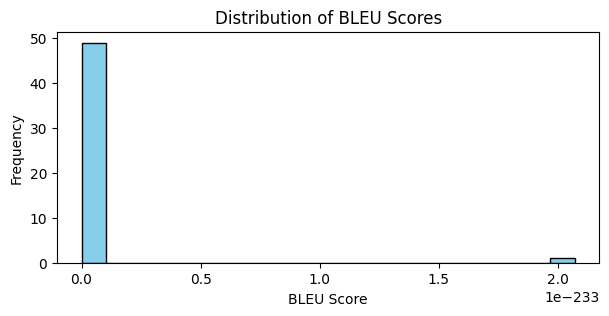

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
bleu_scores = [result['bleu_score'] for result in results]
plt.hist(bleu_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.title('Distribution of BLEU Scores')
plt.show()

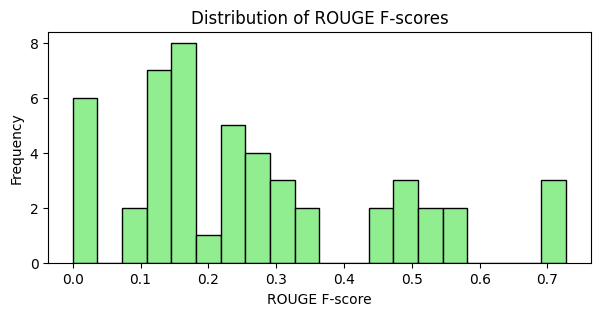

In [55]:
plt.figure(figsize=(7, 3))
rouge_f_scores = [result['rouge_score_f'] for result in results]
plt.hist(rouge_f_scores, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('ROUGE F-score')
plt.ylabel('Frequency')
plt.title('Distribution of ROUGE F-scores')
plt.show()

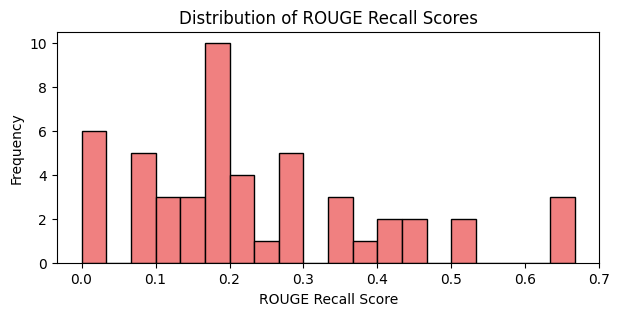

In [56]:
plt.figure(figsize=(7, 3))
rouge_r_scores = [result['rouge_score_r'] for result in results]
plt.hist(rouge_r_scores, bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('ROUGE Recall Score')
plt.ylabel('Frequency')
plt.title('Distribution of ROUGE Recall Scores')
plt.show()

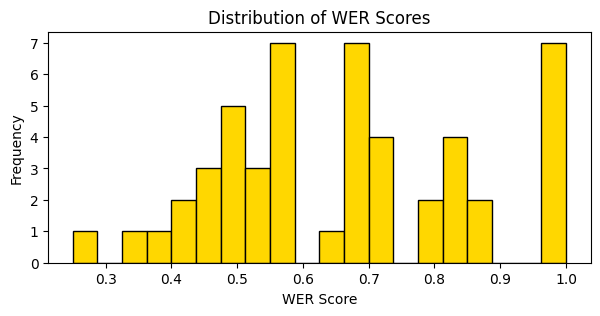

In [57]:
plt.figure(figsize=(7, 3))
wer_scores = [result['wer_score'] for result in results]
plt.hist(wer_scores, bins=20, color='gold', edgecolor='black')
plt.xlabel('WER Score')
plt.ylabel('Frequency')
plt.title('Distribution of WER Scores')
plt.show()

In [58]:
scores = pd.DataFrame(results)
scores.describe()

,bleu_score,rouge_score_f,rouge_score_r,wer_score
count,5.000000e+01,50.000000,50.000000,50.000000
mean,4.277653e-235,0.268236,0.232316,0.660632
std,0.000000e+00,0.197229,0.174260,0.196247
min,0.000000e+00,0.000000,0.000000,0.250000
25%,0.000000e+00,0.133333,0.114583,0.509615
50%,0.000000e+00,0.228758,0.181818,0.666667
75%,0.000000e+00,0.356061,0.321429,0.819444
max,2.070935e-233,0.727273,0.666667,1.000000
